<a href="https://colab.research.google.com/github/sjanwalkar/Sentiment-Analysis/blob/main/Sentiment_Ana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

In [ ]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Tweets.csv")

In [ ]:
data.sample(frac=1).reset_index(drop=True)
print(data.shape)
data.head()

(14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,NaN,Pacific Time (US & Canada)


In [ ]:
# Just selecting airline sentiments and airline, removing rest all columns
data = data[["airline_sentiment","text"]]
data


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


Data Exploratory analysis

In [ ]:
data.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:
sentiment_counts = pd.DataFrame(data['airline_sentiment'].value_counts())

<BarContainer object of 3 artists>

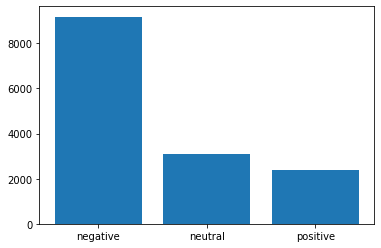

In [ ]:
# Plotting 
plt.bar(sentiment_counts.index, sentiment_counts['airline_sentiment'])

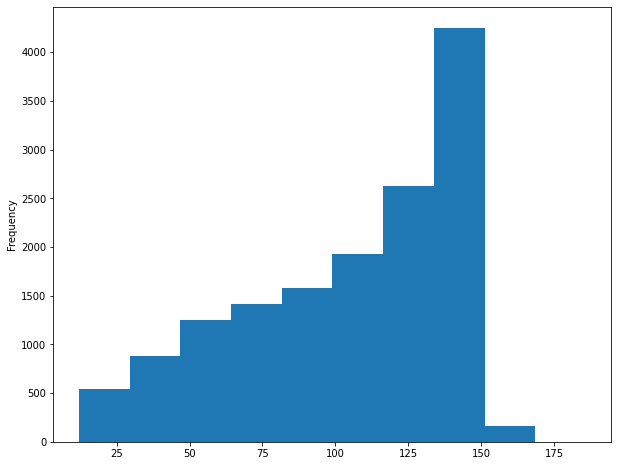

In [ ]:
plt.figure(figsize=(10,8))
data['text'].str.len().plot.hist()

Preprocessing

In [ ]:
data['text']=data['text'].str.replace('@VirginAmerica', '')
data['text']=data['text'].str.replace('@united', '')
data['text']=data['text'].str.replace('@SouthwestAir', '')
data['text']=data['text'].str.replace('@JetBlue', '')
data['text']=data['text'].str.replace('@USAirways', '')
data['text']=data['text'].str.replace('@AmericanAir', '')
data.head()

,airline_sentiment,text
0,neutral,What @dhepburn said.
1,positive,plus you've added commercials to the experien...
2,neutral,I didn't today... Must mean I need to take an...
3,negative,"it's really aggressive to blast obnoxious ""en..."
4,negative,and it's a really big bad thing about it


In [ ]:
data['text'] = data['text'].apply(lambda x :x.lower())
data['text'] = data['text'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]','', x))
data['text'].head(10)

0                                   what dhepburn said
1     plus youve added commercials to the experienc...
2     i didnt today must mean i need to take anothe...
3     its really aggressive to blast obnoxious ente...
4              and its a really big bad thing about it
5     seriously would pay 30 a flight for seats tha...
6     yes nearly every time i fly vx this ear worm ...
7     really missed a prime opportunity for men wit...
8             virginamerica well i didntbut now i do d
9     it was amazing and arrived an hour early your...
Name: text, dtype: object

In [ ]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['text'].values)

X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X) 
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   52,  214],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,  538,  533, 1121, 2454,    1,    2,  192],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    3,
         180,   92,  775,  560,    3,   70,    1,  143,  138,  186],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,   59,  127, 3664,    1, 4597, 4598,
         980,   12,   16, 3091, 3665,   56,   49,   17,  484, 2716],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   

Creating Model

In [ ]:
model = Sequential()
model.add(Embedding(5000, 256, input_length= X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 256)           1280000   
                                                                 
 dropout (Dropout)           (None, 32, 256)           0         
                                                                 
 lstm (LSTM)                 (None, 32, 256)           525312    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y = pd.get_dummies(data['airline_sentiment'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

Training Model

In [ ]:
batch_size =32
epoch = 8

model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, verbose=2)

Epoch 1/8
366/366 - 206s - loss: 0.6465 - accuracy: 0.7293 - 206s/epoch - 564ms/step
Epoch 2/8
366/366 - 198s - loss: 0.4332 - accuracy: 0.8347 - 198s/epoch - 541ms/step
Epoch 3/8
366/366 - 197s - loss: 0.3408 - accuracy: 0.8702 - 197s/epoch - 538ms/step
Epoch 4/8
366/366 - 196s - loss: 0.2804 - accuracy: 0.8945 - 196s/epoch - 536ms/step
Epoch 5/8
366/366 - 197s - loss: 0.2243 - accuracy: 0.9156 - 197s/epoch - 539ms/step
Epoch 6/8
366/366 - 196s - loss: 0.1843 - accuracy: 0.9321 - 196s/epoch - 535ms/step
Epoch 7/8
366/366 - 196s - loss: 0.1551 - accuracy: 0.9448 - 196s/epoch - 535ms/step
Epoch 8/8
366/366 - 196s - loss: 0.1321 - accuracy: 0.9536 - 196s/epoch - 536ms/step


Testing model

In [26]:
predictions = model.predict(X_test)

In [43]:
pos_count, neu_count, neg_count = 0, 0, 0
real_pos, real_neu, real_neg = 0, 0, 0

for i, pred in enumerate(prediction):
  if np.argmax(pred)==2:
    pos_count+=1
  elif np.argmax(pred)==1:
    neu_count+=1
  else:
    neg_count+=1

  
  
 
print("Predict Pos Count = {} ".format(pos_count))  
print("Predict Neutral Count = {} ".format(neu_count))  
print("Predict Negative Count = {} ".format(neg_count))  


Predict Pos Count = 472 
Predict Neutral Count = 726 
Predict Negative Count = 1730 


In [35]:
y_test.reset_index(drop=True, inplace=True)

In [58]:
y_test

,negative,neutral,positive
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
2923,1,0,0
2924,1,0,0
2925,1,0,0
2926,1,0,0
